# Dissected Feature Selection - Select K-Best

## Libraries and Configurations

Import configuration files

In [2]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

Import **data libraries**

In [3]:
import pandas as pd

Import **other libraries**

In [4]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x70f4803fbe10>>

Custom helper scripts

In [5]:
%cd ..
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning

/home/bacci/COMPACT/notebooks
/home/bacci/COMPACT/notebooks/data_exploration_cleaning


## Dissected Data

In [6]:
dissected_df_raw_csv = (
    config["DEFAULT"]["interim_path"] + "dissected/std_dissected_df_raw.csv"
)

In [7]:
df = pd.read_csv(dissected_df_raw_csv, index_col=0)

In [8]:
df

,MAC Address,Channel,DS Channel,Vendor Specific Tags,Length,Label,Supported Rates 1,Supported Rates 2,Supported Rates 3,Supported Rates 4,...,TIM_Broadcast,BSS_Transition,Multiple_BSSID,Timing_Measurement,SSID_List,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification
0,1a:e6:5a:fe:34:4c,1,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1a:e6:5a:fe:34:4c,1,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1a:e6:5a:fe:34:4c,11,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1a:e6:5a:fe:34:4c,1,2.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1a:e6:5a:fe:34:4c,11,2.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,da:a1:19:00:17:f9,6,1.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13940,da:a1:19:1a:cc:8f,6,8.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13941,da:a1:19:41:c9:b1,11,5.0,0050f208002400,143,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13942,da:a1:19:c7:24:b1,1,3.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [9]:
to_drop = ["MAC Address"]

# Backing up the dataframe
df_backup = df.copy()

df = df.drop(to_drop, axis=1)

## Label Encode Categorical Features

In [10]:
# Import label encoder
from sklearn import preprocessing

In [11]:
label_encoder = preprocessing.LabelEncoder()

df["Vendor Specific Tags"] = label_encoder.fit_transform(df["Vendor Specific Tags"])

## Filling `NaN`

In [12]:
df.fillna("-1", inplace=True)

/tmp/ipykernel_5069/4038702002.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("-1", inplace=True)


## Data Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
columns_to_normalize = df.columns[df.columns != "Label"]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

## Splitting Labelled Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns=["Label"])
y = df["Label"]

## Mutual Information

In [17]:
from sklearn.feature_selection import mutual_info_classif

In [18]:
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores  # show a few features with their MI scores

Length                                                 2.645755
Vendor Specific Tags                                   2.253689
Min_MPDCU_Start_Spacing                                1.552808
WNM_Notification                                       1.083135
Interworking                                           1.021706
WNM_Sleep_Mode                                         1.018442
DMS                                                    1.016380
QoS_Map                                                1.014691
SSID_List                                              0.947178
RX_MSC_Bitmask                                         0.791948
Rx_STBC                                                0.781191
Operating_Mode_Notification                            0.779140
TFS                                                    0.761464
FMS                                                    0.759000
TIM_Broadcast                                          0.758855
Extended_Channel_Switching              

In [19]:
mi_scores[:10]

Length                     2.645755
Vendor Specific Tags       2.253689
Min_MPDCU_Start_Spacing    1.552808
WNM_Notification           1.083135
Interworking               1.021706
WNM_Sleep_Mode             1.018442
DMS                        1.016380
QoS_Map                    1.014691
SSID_List                  0.947178
RX_MSC_Bitmask             0.791948
Name: MI Scores, dtype: float64

## Select K-Best

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

In [21]:
selector = SelectKBest(score_func=chi2, k=y.nunique())
selector.fit(X, y)

SelectKBest(k=33, score_func=<function chi2 at 0x70f4360d4d60>)

In [22]:
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['Vendor Specific Tags', 'Supported Rates 1', 'Supported Rates 2',
       'Supported Rates 3', 'Supported Rates 4', 'Extended Supported Rates 1',
       'Extended Supported Rates 2', 'Extended Supported Rates 3',
       'Forty_Mhz_Intolerant', 'DSSS_CCK', 'Rx_STBC', 'Short_GI_40Mhz',
       'SM_Power_Save', 'Supported_Channel_Width', 'LDPC_Coding_Capability',
       'Min_MPDCU_Start_Spacing', 'RX_Highest_Supported_Data_Rate',
       'RX_MSC_Bitmask', '20_40_BSS_Coexistence_Management_Support',
       'Extended_Channel_Switching', 'FMS', 'TFS', 'WNM_Sleep_Mode',
       'TIM_Broadcast', 'BSS_Transition', 'Multiple_BSSID',
       'Timing_Measurement', 'SSID_List', 'DMS', 'Interworking', 'QoS_Map',
       'WNM_Notification', 'Operating_Mode_Notification'],
      dtype='object')


In [33]:
feature_importances = zip(selected_features, selector.scores_)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [34]:
for feature, score in feature_importances:
    print(f"{feature}\t Score: {score}")

BSS_Transition	 Score: 34501.763330327834
TIM_Broadcast	 Score: 32388.5906867948
Extended Supported Rates 3	 Score: 29254.78113626747
Extended Supported Rates 2	 Score: 29254.546842230764
Extended Supported Rates 1	 Score: 29254.49998643754
Supported Rates 4	 Score: 25295.524402304804
Supported Rates 2	 Score: 7472.568111826578
WNM_Notification	 Score: 5431.024373599454
Operating_Mode_Notification	 Score: 5431.024373599454
TFS	 Score: 4963.539456252733
QoS_Map	 Score: 4904.761349115773
20_40_BSS_Coexistence_Management_Support	 Score: 4517.182997319541
Interworking	 Score: 3917.1313360085146
SM_Power_Save	 Score: 3547.476580991741
Rx_STBC	 Score: 3300.9798642493943
Min_MPDCU_Start_Spacing	 Score: 3299.1487828664117
DSSS_CCK	 Score: 3213.3915114164965
Forty_Mhz_Intolerant	 Score: 3045.6570292230253
FMS	 Score: 2903.901092676952
RX_MSC_Bitmask	 Score: 2657.5723815545657
Extended_Channel_Switching	 Score: 2657.5723815545657
Supported_Channel_Width	 Score: 2543.000677443323
RX_Highest_Suppo

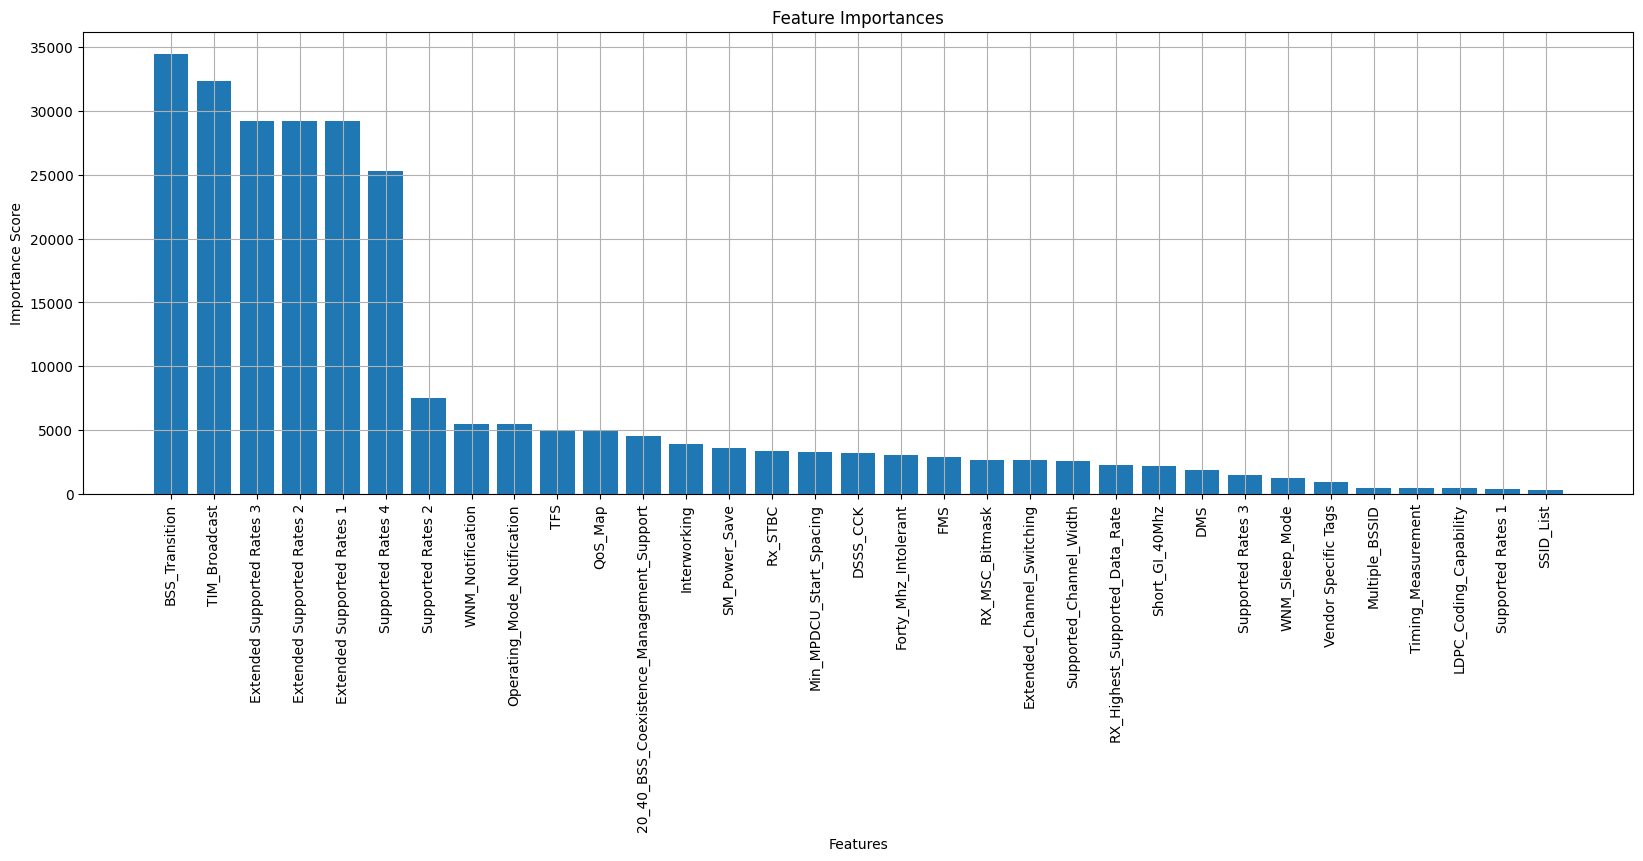

In [43]:
import matplotlib.pyplot as plt

# Extract the feature names and scores
feature_names = [feature for feature, _ in feature_importances]
scores = [score for _, score in feature_importances]


# Plot the bar chart
plt.figure(figsize=(20, 6))

plt.bar(feature_names, scores)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.grid(True)  # Add grid
plt.show()